In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Read the Excel file
file_path = '../raw_data/productivity_data/major-industry-total-factor-productivity-klems.xlsx'
sectoral_tfp_df = pd.read_excel(file_path, header=2)

In [4]:
# Read the Excel file
file_path = '../raw_data/dynamism_data/bds2022_sec.csv'
bds_sec = pd.read_csv(file_path)


In [5]:
bds_sec.head()

,year,sector,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,estabs_exit,estabs_exit_rate,...,job_destruction_deaths,job_destruction_continuers,job_destruction_rate_deaths,job_destruction_rate,net_job_creation,net_job_creation_rate,reallocation_rate,firmdeath_firms,firmdeath_estabs,firmdeath_emp
0,1978,11,20358,21019,185795,178798,4011,19.226,3698,17.726,...,17668,26056,9.882,24.454,13648,7.633,48.909,2690,2715,12047
1,1978,21,19105,24709,708633,710248,3948,16.224,3199,13.146,...,59996,108348,8.447,23.702,-3276,-0.461,46.482,1747,1783,16712
2,1978,22,5681,11859,658516,643489,928,7.946,567,4.855,...,12451,38747,1.935,7.956,29722,4.619,15.913,215,217,1820
3,1978,23,426309,431986,4095927,3822634,91838,22.160,56730,13.689,...,273470,514999,7.154,20.626,547863,14.332,41.253,43833,43872,190035
4,1978,31-33,263909,311911,18324614,17892952,33616,10.894,26929,8.727,...,528925,1017235,2.956,8.641,861142,4.813,17.282,18993,19135,224138


In [6]:
bds_sec["sector"].unique()

array(['11', '21', '22', '23', '31-33', '42', '44-45', '48-49', '51',
       '52', '53', '54', '55', '56', '61', '62', '71', '72', '81'],
      dtype=object)

In [7]:
sectoral_tfp_df["NAICS"].unique()

array(['11', '111-112', '113-115', '21', '211', '212', '213', '22', '23',
       'MN', 'DM', 'ND', '321', '327', '331', '332', '333', '334', '335',
       '3361-3363', '3364-3369', '337', '339', '311-312', '313-314',
       '315-316', '322', '323', '324', '325', '326', '42,44-45', '42',
       '44,45', '48-49', '481', '482', '483', '484', '485', '486',
       '487,488,492', '493', '51', '511', '512', '515,517', '518-519',
       '52-53', '52', '521-522', '523', '524', '525', '53', '531',
       '532-533', '54-81', '54-56', '54', '5411', '5415',
       '5412-5414,5416-5419', '55', '56', '561', '562', '61-62', '61',
       '62', '621', '622-623', '624', '71-72', '71', '711-712', '713',
       '72', '721', '722', '81'], dtype=object)

In [8]:
sectoral_tfp_df['NAICS']

0       11
1       11
2       11
3       11
4       11
        ..
7285    81
7286    81
7287    81
7288    81
7289    81
Name: NAICS, Length: 7290, dtype: object

In [9]:
# Replace the NAICS codes in your DataFrame
sectoral_tfp_df['NAICS'] = sectoral_tfp_df['NAICS'].replace({
    'MN': '31-33',  # Manufacturing
    'DM': '33',     # Durable Manufacturing  
    'ND': '31'      # Non-durable Manufacturing
})

# Verify the changes
print("Updated NAICS codes:")
print(sectoral_tfp_df['NAICS'].unique())

Updated NAICS codes:
['11' '111-112' '113-115' '21' '211' '212' '213' '22' '23' '31-33' '33'
 '31' '321' '327' '331' '332' '333' '334' '335' '3361-3363' '3364-3369'
 '337' '339' '311-312' '313-314' '315-316' '322' '323' '324' '325' '326'
 '42,44-45' '42' '44,45' '48-49' '481' '482' '483' '484' '485' '486'
 '487,488,492' '493' '51' '511' '512' '515,517' '518-519' '52-53' '52'
 '521-522' '523' '524' '525' '53' '531' '532-533' '54-81' '54-56' '54'
 '5411' '5415' '5412-5414,5416-5419' '55' '56' '561' '562' '61-62' '61'
 '62' '621' '622-623' '624' '71-72' '71' '711-712' '713' '72' '721' '722'
 '81']


In [10]:
# Create a new DataFrame with only two-digit NAICS codes
two_digit_sectoral_df = sectoral_tfp_df[sectoral_tfp_df['NAICS'].str.len() == 2].copy()

# Display the unique two-digit NAICS codes
print("Two-digit NAICS codes in the new DataFrame:")
print(sorted(two_digit_sectoral_df['NAICS'].unique()))

# Show the shape of the new DataFrame
print(f"\nOriginal DataFrame shape: {sectoral_tfp_df.shape}")
print(f"Two-digit NAICS DataFrame shape: {two_digit_sectoral_df.shape}")

# Display first few rows
print(f"\nFirst few rows of two_digit_naics_df:")
print(two_digit_sectoral_df.head())

Two-digit NAICS codes in the new DataFrame:
['11', '21', '22', '23', '31', '33', '42', '51', '52', '53', '54', '55', '56', '61', '62', '71', '72', '81']

Original DataFrame shape: (7290, 42)
Two-digit NAICS DataFrame shape: (1620, 42)

First few rows of two_digit_naics_df:
  NAICS                                     Industry        Basis  \
0    11  Agriculture, forestry, fishing, and hunting  All workers   
1    11  Agriculture, forestry, fishing, and hunting  All workers   
2    11  Agriculture, forestry, fishing, and hunting  All workers   
3    11  Agriculture, forestry, fishing, and hunting  All workers   
4    11  Agriculture, forestry, fishing, and hunting  All workers   

                     Measure             Units     1987     1988     1989  \
0  Total factor productivity  Index (2017=100)   68.776   63.369   66.843   
1       Real sectoral output  Index (2017=100)    72.72   69.774   73.276   
2            Combined inputs  Index (2017=100)  105.735  110.107  109.624   
3  

In [11]:
sectoral_tfp_df["Measure"].unique()

array(['Total factor productivity', 'Real sectoral output',
       'Combined inputs', 'Capital input', 'Labor input', 'Hours worked',
       'Labor composition', 'Labor productivity', 'Capital productivity',
       'Capital intensity', 'Intermediate inputs', 'Energy input',
       'Materials input', 'Services input',
       'Sectoral output price deflator', 'Capital price deflator',
       'Labor price deflator', 'Intermediate inputs price deflator',
       'Energy price deflator', 'Materials price deflator',
       'Services price deflator', 'Combined inputs price deflator',
       'Intermediate inputs productivity', 'Energy productivity',
       'Materials productivity', 'Services productivity',
       'Unit labor costs', 'Unit capital costs',
       'Contribution of labor composition to labor productivity',
       'Contribution of capital intensity to labor productivity',
       'Contribution of information processing equipment (IPE) intensity to labor productivity',
       'Contrib

In [12]:
long_df = sectoral_tfp_df.melt(
    id_vars=['NAICS', 'Industry', 'Basis', 'Measure', 'Units'], 
    var_name='year', 
    value_name='value'  
)

In [13]:
long_df.head()

,NAICS,Industry,Basis,Measure,Units,year,value
0,11,"Agriculture, forestry, fishing, and hunting",All workers,Total factor productivity,Index (2017=100),1987,68.776
1,11,"Agriculture, forestry, fishing, and hunting",All workers,Real sectoral output,Index (2017=100),1987,72.72
2,11,"Agriculture, forestry, fishing, and hunting",All workers,Combined inputs,Index (2017=100),1987,105.735
3,11,"Agriculture, forestry, fishing, and hunting",All workers,Capital input,Index (2017=100),1987,101.071
4,11,"Agriculture, forestry, fishing, and hunting",All workers,Labor input,Index (2017=100),1987,101.747


In [15]:
tfp_long = long_df[long_df['Measure'] == 'Total factor productivity'].copy()
output_long = long_df[long_df['Measure'] == 'Sectoral output'].copy()

In [16]:
output_long.head()

,NAICS,Industry,Basis,Measure,Units,year,value
77,11,"Agriculture, forestry, fishing, and hunting",All workers,Sectoral output,Billions of current dollars,1987,150.166
167,111-112,Crop & animal production (Farms),All workers,Sectoral output,Billions of current dollars,1987,138.811
257,113-115,"Forestry, fishing, and related activities",All workers,Sectoral output,Billions of current dollars,1987,20.787
347,21,Mining,All workers,Sectoral output,Billions of current dollars,1987,112.374
437,211,Oil and gas extraction,All workers,Sectoral output,Billions of current dollars,1987,67.722


In [17]:
output_pivot = output_long.pivot_table(
    values='value', 
    index='year', 
    columns='NAICS', 
    aggfunc='sum',
    fill_value=0
)

weights = (
    output_pivot.apply(lambda row: row / (row.sum() + 1e-10), axis=1)
    .stack()
    .reset_index()
    .rename(columns={0: 'weight'})
)

tfp_with_weights = tfp_long.merge(
    weights,
    on=['year', 'NAICS'],
    how='left'
).fillna({'weight': 0})

C:\Users\Lamb\AppData\Local\Temp\ipykernel_1164\817515597.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  output_pivot = output_long.pivot_table(


In [130]:
tfp_with_weights.head()

,NAICS,Industry,Basis,Measure,Units,year,value,weight
0,11,"Agriculture, forestry, fishing, and hunting",All workers,Total factor productivity,Index (2017=100),1987,68.776,0.009333
1,11,"Agriculture, forestry, fishing, and hunting",All workers,Total factor productivity,% Change from previous year,1987,N.A.,0.009333
2,111-112,Crop & animal production (Farms),All workers,Total factor productivity,Index (2017=100),1987,66.315,0.008627
3,111-112,Crop & animal production (Farms),All workers,Total factor productivity,% Change from previous year,1987,N.A.,0.008627
4,113-115,"Forestry, fishing, and related activities",All workers,Total factor productivity,Index (2017=100),1987,114.554,0.001292


In [131]:
tfp_with_weights['Measure'].unique()

array(['Total factor productivity'], dtype=object)

In [ ]:
tfp_units = tfp_with_weights['Units'].value_counts()
print("Units used for Total factor productivity:\n", tfp_units)

tfp_pivoted = tfp_with_weights.pivot(
    index=['NAICS', 'Industry', 'Basis', 'year', 'weight'],
    columns='Units',
    values='value'
).reset_index()

tfp_pivoted.columns.name = None

tfp_pivoted = tfp_pivoted.rename(columns={
    'Index (2017=100)': 'tfp_index_2017',
    '% Change from previous year': 'tfp_pct_change'
})

# Display a sample of the result
print("\nFirst few rows of pivoted TFP data:")
tfp_pivoted.head()

Units used for Total factor productivity:
 Units
Index (2017=100)               2997
% Change from previous year    2997
Name: count, dtype: int64

First few rows of pivoted TFP data:


,NAICS,Industry,Basis,year,weight,tfp_pct_change,tfp_index_2017
0,11,"Agriculture, forestry, fishing, and hunting",All workers,1987,0.009333,N.A.,68.776
1,11,"Agriculture, forestry, fishing, and hunting",All workers,1988,0.008802,-7.9,63.369
2,11,"Agriculture, forestry, fishing, and hunting",All workers,1989,0.008845,5.5,66.843
3,11,"Agriculture, forestry, fishing, and hunting",All workers,1990,0.008622,5.5,70.492
4,11,"Agriculture, forestry, fishing, and hunting",All workers,1991,0.008256,0.8,71.025


In [160]:
tfp_pivoted.isna().sum()

NAICS             0
Industry          0
Basis             0
year              0
weight            0
tfp_pct_change    0
tfp_index_2017    0
dtype: int64

In [ ]:
bds_sec['year'] = bds_sec['year'].astype(int)
bds_87_on = bds_sec[bds_sec['year'] >= 1987]

In [ ]:
tfp_pivoted['year'] = tfp_pivoted['year'].astype(int)

merged = pd.merge(
    bds_87_on,
    tfp_pivoted, 
    on=['NAICS','year'],  
    how='left'
)

In [166]:
merged.head(20)

,year,NAICS,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,estabs_exit,estabs_exit_rate,job_creation,job_creation_births,job_creation_continuers,job_creation_rate_births,job_creation_rate,job_destruction,job_destruction_deaths,job_destruction_continuers,job_destruction_rate_deaths,job_destruction_rate,net_job_creation,net_job_creation_rate,reallocation_rate,firmdeath_firms,firmdeath_estabs,firmdeath_emp,Industry,Basis,weight,tfp_pct_change,tfp_index_2017
0,1987,11,18421,18977,170858,170501,3109,16.513,2811,14.930,47176,17183,29993,10.078,27.669,46099,18778,27321,11.013,27.037,1077,0.632,54.075,2058,2060,11605,"Agriculture, forestry, fishing, and hunting",All workers,0.009333,N.A.,68.776
1,1987,21,21621,27222,578807,632507,3291,11.498,6090,21.278,97884,41428,56456,6.550,15.476,205220,75848,129372,11.992,32.445,-107336,-16.970,30.951,4029,4064,31974,Mining,All workers,0.006984,N.A.,66.059
2,1987,22,5844,12393,774290,772758,654,5.294,575,4.655,45838,13958,31880,1.806,5.932,43066,7975,35091,1.032,5.573,2772,0.359,11.146,313,315,1606,Utilities,All workers,0.013570,N.A.,76.927
3,1987,23,485658,492062,4965017,4877830,90479,18.838,66956,13.940,1407254,441939,965315,9.060,28.850,1234210,409421,824789,8.394,25.302,173044,3.548,50.605,49892,49934,282447,Construction,All workers,0.030664,N.A.,116.637
4,1987,31-33,286017,332737,16522435,16658447,35126,10.577,33854,10.194,1897280,535297,1361983,3.213,11.389,2174495,760351,1414144,4.564,13.053,-277215,-1.664,22.779,23996,24227,300581,Manufacturing sector,All workers,0.101077,N.A.,76.544
5,1987,42,279786,357272,4671838,4637353,43355,12.146,42714,11.966,883091,307018,576073,6.621,19.043,812078,325172,486906,7.012,17.512,71013,1.531,35.023,26632,27290,159386,Wholesale trade,All workers,0.021017,N.A.,68.663
6,1987,44-45,729897,1059955,11923546,11732794,136344,12.912,128328,12.153,2293835,988114,1305721,8.422,19.551,1911575,783482,1128093,6.678,16.293,382260,3.258,32.585,82526,85578,409953,NaN,NaN,NaN,NaN,NaN
7,1987,48-49,103252,128677,2852556,2799704,22360,17.603,19056,15.002,578143,190321,387822,6.798,20.650,472182,204940,267242,7.320,16.865,105961,3.785,33.731,13083,13241,90227,Transportation and warehousing,All workers,0.014584,N.A.,77.4
8,1987,51,46228,76072,2539117,2542860,12180,16.119,11158,14.767,511203,273987,237216,10.775,20.103,516975,164781,352194,6.480,20.330,-5772,-0.227,40.207,6926,7103,70255,Information,All workers,0.016606,N.A.,78.021
9,1987,52,173890,289319,5493500,5369892,34083,11.950,25878,9.073,956966,321318,635648,5.984,17.821,707275,218544,488731,4.070,13.171,249691,4.650,26.342,15843,16202,100021,Finance and insurance,All workers,0.025597,N.A.,99.457


In [167]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Set display options to show all rows
pd.set_option('display.max_rows', None)

merged.describe()

,year,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,estabs_exit,estabs_exit_rate,job_creation,job_creation_births,job_creation_rate_births,job_creation_rate,job_destruction,job_destruction_deaths,job_destruction_continuers,job_destruction_rate_deaths,job_destruction_rate,net_job_creation,net_job_creation_rate,reallocation_rate,firmdeath_firms,firmdeath_estabs,firmdeath_emp,weight
count,684.000000,684.000000,6.840000e+02,6.840000e+02,6.840000e+02,684.000000,684.000000,684.000000,684.000000,6.840000e+02,6.840000e+02,684.000000,684.000000,6.840000e+02,684.000000,6.840000e+02,684.000000,684.000000,6.840000e+02,684.000000,684.000000,684.000000,684.000000,684.000000,648.000000
mean,2004.500000,263569.961988,3.386948e+05,5.866836e+06,5.832662e+06,37379.024854,11.437156,34075.116959,10.369716,8.654562e+05,2.977018e+05,5.417298,15.741762,7.972603e+05,266562.792398,5.306975e+05,4.903659,14.632178,6.819591e+04,1.109554,27.524262,22288.216374,22864.292398,137149.785088,0.018568
std,10.395897,225128.317520,2.872606e+05,4.874292e+06,4.853131e+06,30643.440893,2.975385,28519.644899,2.516603,6.580186e+05,2.525200e+05,2.220676,4.819031,6.177803e+05,208825.159798,4.181386e+05,1.922407,4.745962,2.421962e+05,3.957971,8.214498,19468.955781,20025.389536,120018.899006,0.016916
min,1987.000000,5354.000000,1.239300e+04,1.493700e+05,1.495870e+05,654.000000,4.005000,575.000000,3.912000,1.996600e+04,6.406000e+03,1.566000,5.251000,2.070300e+04,6028.000000,1.317000e+04,0.824000,5.264000,-2.232807e+06,-29.845000,10.502000,179.000000,181.000000,1012.000000,0.001747
25%,1995.750000,59835.250000,7.459775e+04,2.128340e+06,2.103328e+06,9412.000000,9.175500,7580.500000,8.525000,3.155608e+05,1.019872e+05,3.934500,12.273500,2.688122e+05,83841.000000,1.803600e+05,3.584000,11.486000,-5.001250e+03,-0.389500,21.269500,5157.250000,5248.750000,36563.750000,0.008171
50%,2004.500000,220516.000000,3.074020e+05,4.759006e+06,4.728988e+06,33547.000000,11.494500,30249.000000,10.357500,7.358895e+05,2.260015e+05,5.214500,15.641000,6.653465e+05,223934.500000,4.375140e+05,4.803000,14.285500,5.525200e+04,1.611000,27.683500,18597.500000,19095.500000,100494.000000,0.013911
75%,2013.250000,474775.250000,5.534522e+05,8.210303e+06,8.055515e+06,61274.000000,13.473500,53555.000000,12.081000,1.353749e+06,4.353390e+05,6.609750,18.683250,1.236114e+06,418103.750000,8.233258e+05,6.204250,17.314750,1.644072e+05,2.956250,32.584250,37140.000000,37897.750000,227640.250000,0.025148
max,2022.000000,737428.000000,1.094884e+06,2.120506e+07,2.102796e+07,136344.000000,20.840000,128328.000000,21.278000,3.082015e+06,1.058285e+06,13.855000,37.724000,3.760734e+06,878078.000000,2.901096e+06,11.992000,39.072000,1.593988e+06,26.221000,54.075000,88282.000000,88353.000000,483965.000000,0.101077


In [168]:
merged.columns

Index(['year', 'NAICS', 'firms', 'estabs', 'emp', 'denom', 'estabs_entry',
       'estabs_entry_rate', 'estabs_exit', 'estabs_exit_rate', 'job_creation',
       'job_creation_births', 'job_creation_continuers',
       'job_creation_rate_births', 'job_creation_rate', 'job_destruction',
       'job_destruction_deaths', 'job_destruction_continuers',
       'job_destruction_rate_deaths', 'job_destruction_rate',
       'net_job_creation', 'net_job_creation_rate', 'reallocation_rate',
       'firmdeath_firms', 'firmdeath_estabs', 'firmdeath_emp', 'Industry',
       'Basis', 'weight', 'tfp_pct_change', 'tfp_index_2017'],
      dtype='object')

In [173]:
# Create a new column for the percentage of firms destroyed
merged['firms_percent_destroyed'] = (merged['firmdeath_firms'] / merged['firms']) * 100

In [174]:
# Save the merged DataFrame to CSV in the processed_data folder
output_path = '/Users/danielseymour/Developer/EC334-Summative/processed_data/two_digit_NAICS_bds_tfp.csv'
merged.to_csv(output_path, index=False)
print(f"Data saved to {output_path}")

Data saved to /Users/danielseymour/Developer/EC334-Summative/processed_data/two_digit_NAICS_bds_tfp.csv


Available NAICS codes in your dataset:
['11' '21' '22' '23' '31-33' '42' '44-45' '48-49' '51' '52' '53' '54' '55'
 '56' '61' '62' '71' '72' '81']

To create plots, use:
1. plot_industry_time_series(merged, naics_code='21')  # for specific NAICS
2. plot_multiple_industries_comparison(merged, naics_codes=['21', '22', '23'])
3. plot_productivity_distributions(merged)
4. summary_stats = create_summary_stats(merged)


KeyError: 'Index (2017=100)'

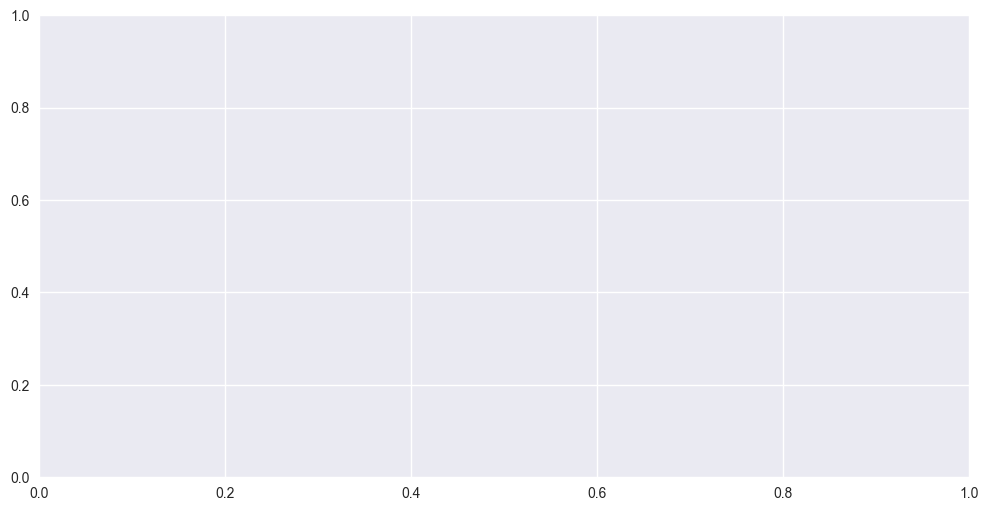

In [ ]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


def plot_industry_time_series(df, naics_code=None, industry_name=None):
    fig, ax = plt.subplots(figsize=(12, 6))
    
    if naics_code:
        industry_data = df[df['NAICS'] == naics_code].copy()
        title_suffix = f"NAICS {naics_code}"
    elif industry_name:
        industry_data = df[df['Industry'].str.contains(industry_name, case=False, na=False)].copy()
        title_suffix = industry_name
    else:

        naics_code = df['NAICS'].iloc[0]
        industry_data = df[df['NAICS'] == naics_code].copy()
        title_suffix = f"NAICS {naics_code}"
    
    if not industry_data.empty:
        industry_data = industry_data.sort_values('year')
        
        ax.plot(industry_data['year'], industry_data['Index (2017=100)'], 
                marker='o', linewidth=2.5, markersize=6)
        
        ax.axhline(y=100, color='red', linestyle='--', alpha=0.7, label='2017 Baseline')
        
        ax.set_title(f'Productivity Index Time Series - {title_suffix}', fontsize=14, fontweight='bold')
        ax.set_xlabel('Year', fontsize=12)
        ax.set_ylabel('Index (2017=100)', fontsize=12)
        ax.grid(True, alpha=0.3)
        ax.legend()
        
        for i, row in industry_data.iterrows():
            if row['year'] % 3 == 0: 
                ax.annotate(f"{row['Index (2017=100)']:.1f}", 
                           (row['year'], row['Index (2017=100)']),
                           textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.tight_layout()
    return fig

def plot_multiple_industries_comparison(df, naics_codes=None, max_industries=5):
    fig, ax = plt.subplots(figsize=(14, 8))
    
    if naics_codes is None:
        # Select top industries by data availability
        naics_codes = df['NAICS'].value_counts().head(max_industries).index.tolist()
    
    for naics in naics_codes:
        industry_data = df[df['NAICS'] == naics].copy().sort_values('year')
        if not industry_data.empty:
            industry_name = industry_data['Industry'].iloc[0] if 'Industry' in industry_data.columns else f"NAICS {naics}"
            ax.plot(industry_data['year'], industry_data['Index (2017=100)'], 
                   marker='o', linewidth=2, label=f"{naics}: {industry_name[:30]}...")
    
    ax.axhline(y=100, color='red', linestyle='--', alpha=0.7, label='2017 Baseline')
    ax.set_title('Productivity Index Comparison Across Industries', fontsize=14, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Index (2017=100)', fontsize=12)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

def plot_productivity_distributions(df):
    """
    Create distribution plots for key metrics
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    axes[0,0].hist(df['Index (2017=100)'].dropna(), bins=30, alpha=0.7, edgecolor='black')
    axes[0,0].axvline(100, color='red', linestyle='--', label='2017 Baseline')
    axes[0,0].set_title('Distribution of Productivity Index')
    axes[0,0].set_xlabel('Index (2017=100)')
    axes[0,0].legend()
    
    axes[0,1].hist(df['% Change from previous year'].dropna(), bins=30, alpha=0.7, edgecolor='black')
    axes[0,1].axvline(0, color='red', linestyle='--', label='No Change')
    axes[0,1].set_title('Distribution of Year-over-Year % Change')
    axes[0,1].set_xlabel('% Change from previous year')
    axes[0,1].legend()
    
    if 'emp' in df.columns:
        scatter_data = df.dropna(subset=['emp', 'Index (2017=100)'])
        axes[1,0].scatter(scatter_data['emp'], scatter_data['Index (2017=100)'], alpha=0.6)
        axes[1,0].set_title('Employment vs Productivity Index')
        axes[1,0].set_xlabel('Employment')
        axes[1,0].set_ylabel('Index (2017=100)')
        axes[1,0].set_xscale('log')
    
    if 'firms' in df.columns:
        scatter_data = df.dropna(subset=['firms', 'Index (2017=100)'])
        axes[1,1].scatter(scatter_data['firms'], scatter_data['Index (2017=100)'], alpha=0.6)
        axes[1,1].set_title('Number of Firms vs Productivity Index')
        axes[1,1].set_xlabel('Number of Firms')
        axes[1,1].set_ylabel('Index (2017=100)')
        axes[1,1].set_xscale('log')
    
    plt.tight_layout()
    return fig

def create_summary_stats(df):
    key_vars = ['Index (2017=100)', '% Change from previous year', 'emp', 'firms', 'estabs']
    available_vars = [var for var in key_vars if var in df.columns]
    
    summary = df[available_vars].describe()
    return summary


if not merged.empty:
    first_naics = merged['NAICS'].iloc[0]
    fig1 = plot_industry_time_series(merged, naics_code=first_naics)
    plt.show()
    
    print("\nSummary Statistics:")
    print(create_summary_stats(merged))

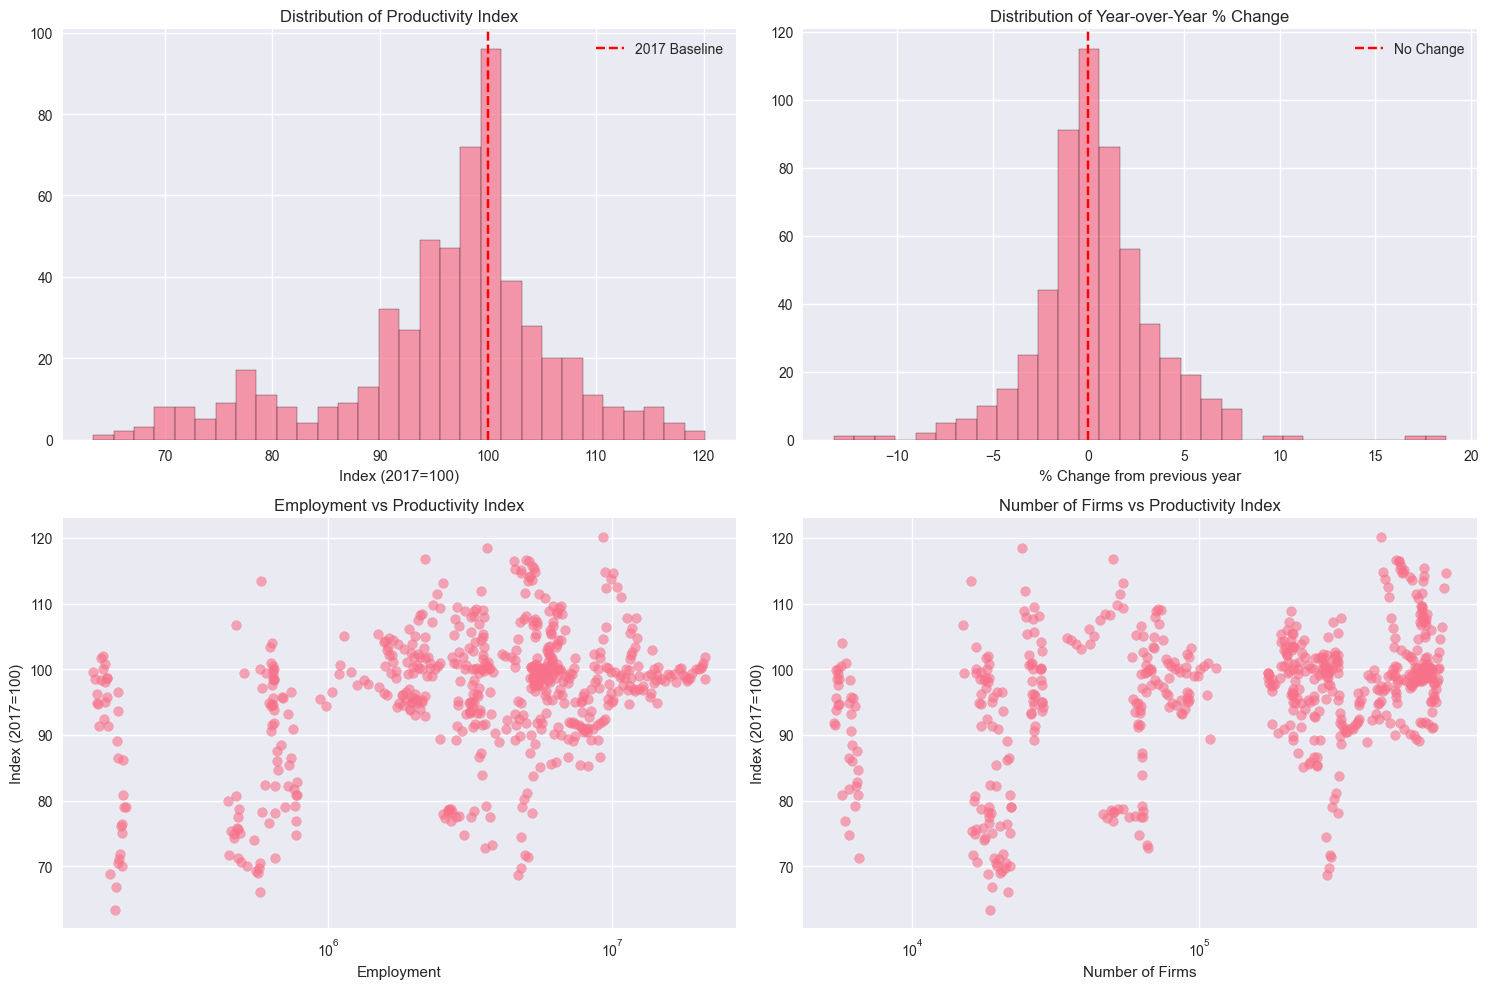

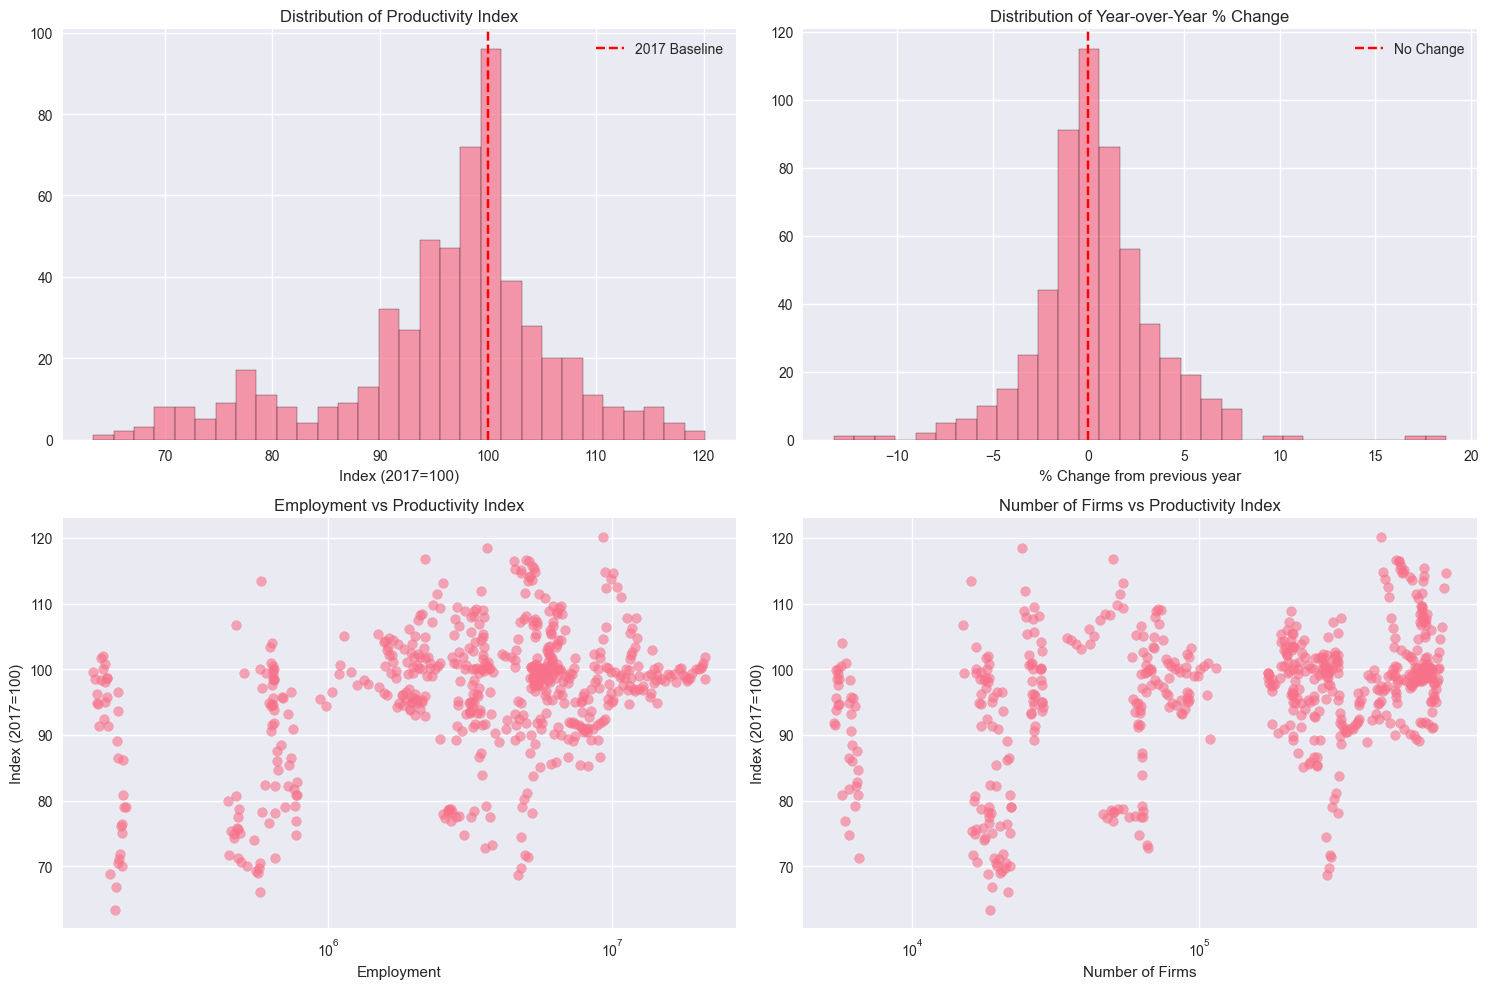

In [79]:
plot_productivity_distributions(merged)


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def create_moving_averages(df, window=3):
    """
    Create 3-year moving averages for job dynamics variables
    """
    # Job dynamics variables to smooth
    job_vars = [
        'job_creation', 'job_creation_rate', 'job_creation_births', 'job_creation_continuers',
        'job_destruction', 'job_destruction_rate', 'job_destruction_deaths', 'job_destruction_continuers',
        'net_job_creation', 'net_job_creation_rate', 'reallocation_rate',
        'estabs_entry', 'estabs_entry_rate', 'estabs_exit', 'estabs_exit_rate',
        '% Change from previous year', 'Index (2017=100)'
    ]
    
    # Only include variables that exist in the dataframe
    available_vars = [var for var in job_vars if var in df.columns]
    
    # Create moving averages by NAICS code
    df_ma = df.copy()
    
    for naics in df['NAICS'].unique():
        mask = df['NAICS'] == naics
        naics_data = df[mask].sort_values('year')
        
        for var in available_vars:
            if var in naics_data.columns:
                # Calculate 3-year moving average
                ma_values = naics_data[var].rolling(window=window, center=True, min_periods=1).mean()
                df_ma.loc[mask, f'{var}_MA3'] = ma_values.values
    
    return df_ma

def run_productivity_job_regressions(df_ma):
    """
    Run various regressions relating job dynamics to productivity
    """
    results = {}
    
    # Define regression specifications
    regressions = {
        'Net Job Creation Impact': {
            'y': 'Index (2017=100)_MA3',
            'x': ['net_job_creation_rate_MA3', 'reallocation_rate_MA3']
        },
        'Job Creation vs Destruction': {
            'y': '% Change from previous year_MA3',
            'x': ['job_creation_rate_MA3', 'job_destruction_rate_MA3']
        },
        'Entry vs Exit Effects': {
            'y': 'Index (2017=100)_MA3',
            'x': ['estabs_entry_rate_MA3', 'estabs_exit_rate_MA3', 'net_job_creation_rate_MA3']
        },
        'Birth vs Continuing Establishments': {
            'y': '% Change from previous year_MA3',
            'x': ['job_creation_rate_births_MA3', 'job_creation_continuers_MA3', 'job_destruction_rate_MA3']
        }
    }
    
    for reg_name, spec in regressions.items():
        print(f"\n{'='*60}")
        print(f"REGRESSION: {reg_name}")
        print(f"{'='*60}")
        
        # Check if all variables exist
        all_vars = [spec['y']] + spec['x']
        available_vars = [var for var in all_vars if var in df_ma.columns]
        
        if len(available_vars) == len(all_vars):
            # Create regression dataset
            reg_data = df_ma[available_vars + ['NAICS', 'year']].dropna()
            
            if len(reg_data) > 10:  # Ensure sufficient observations
                y = reg_data[spec['y']]
                X = reg_data[spec['x']]
                
                # Add constant for intercept
                X_with_const = sm.add_constant(X)
                
                # Run regression
                model = sm.OLS(y, X_with_const).fit()
                results[reg_name] = {
                    'model': model,
                    'data': reg_data,
                    'r_squared': model.rsquared,
                    'adj_r_squared': model.rsquared_adj,
                    'n_obs': len(reg_data)
                }
                
                # Print results
                print(f"Observations: {len(reg_data)}")
                print(f"R-squared: {model.rsquared:.4f}")
                print(f"Adj. R-squared: {model.rsquared_adj:.4f}")
                print(f"F-statistic p-value: {model.f_pvalue:.4f}")
                print("\nCoefficients:")
                print(model.summary().tables[1])
                
            else:
                print(f"Insufficient data ({len(reg_data)} observations)")
        else:
            missing_vars = [var for var in all_vars if var not in df_ma.columns]
            print(f"Missing variables: {missing_vars}")
    
    return results

def plot_regression_diagnostics(results):
    """
    Create diagnostic plots for regression results
    """
    n_regressions = len(results)
    if n_regressions == 0:
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    for i, (reg_name, result) in enumerate(results.items()):
        if i >= 4:  # Only plot first 4 regressions
            break
            
        model = result['model']
        reg_data = result['data']
        
        # Residuals vs Fitted
        fitted_values = model.fittedvalues
        residuals = model.resid
        
        axes[i].scatter(fitted_values, residuals, alpha=0.6)
        axes[i].axhline(y=0, color='red', linestyle='--')
        axes[i].set_xlabel('Fitted Values')
        axes[i].set_ylabel('Residuals')
        axes[i].set_title(f'{reg_name}\nResiduals vs Fitted (R² = {result["r_squared"]:.3f})')
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

def industry_specific_analysis(df_ma, naics_codes=None):
    """
    Run regressions for specific industries
    """
    if naics_codes is None:
        # Use top 5 industries by data availability
        naics_codes = df_ma['NAICS'].value_counts().head(5).index.tolist()
    
    industry_results = {}
    
    for naics in naics_codes:
        print(f"\n{'='*50}")
        print(f"INDUSTRY ANALYSIS: NAICS {naics}")
        print(f"{'='*50}")
        
        industry_data = df_ma[df_ma['NAICS'] == naics].copy()
        
        if len(industry_data) >= 5:  # Need minimum observations
            # Simple regression: Net job creation rate vs productivity change
            if all(col in industry_data.columns for col in ['% Change from previous year_MA3', 'net_job_creation_rate_MA3']):
                y = industry_data['% Change from previous year_MA3'].dropna()
                x = industry_data['net_job_creation_rate_MA3'].dropna()
                
                # Align the data
                common_index = y.index.intersection(x.index)
                if len(common_index) >= 3:
                    y_aligned = y.loc[common_index]
                    x_aligned = x.loc[common_index]
                    
                    # Run regression
                    X_with_const = sm.add_constant(x_aligned)
                    model = sm.OLS(y_aligned, X_with_const).fit()
                    
                    industry_results[naics] = {
                        'model': model,
                        'r_squared': model.rsquared,
                        'coefficient': model.params.iloc[-1],
                        'p_value': model.pvalues.iloc[-1]
                    }
                    
                    print(f"Net Job Creation Rate → Productivity Change")
                    print(f"Coefficient: {model.params.iloc[-1]:.4f}")
                    print(f"P-value: {model.pvalues.iloc[-1]:.4f}")
                    print(f"R-squared: {model.rsquared:.4f}")
                else:
                    print("Insufficient aligned data")
            else:
                print("Required variables not available")
        else:
            print(f"Insufficient data ({len(industry_data)} observations)")
    
    return industry_results

def plot_job_dynamics_trends(df_ma, naics_codes=None):
    """
    Plot job creation/destruction trends with moving averages
    """
    if naics_codes is None:
        naics_codes = df_ma['NAICS'].value_counts().head(4).index.tolist()
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for i, naics in enumerate(naics_codes):
        if i >= 4:
            break
            
        industry_data = df_ma[df_ma['NAICS'] == naics].sort_values('year')
        
        if not industry_data.empty and 'job_creation_rate_MA3' in df_ma.columns:
            # Plot job creation and destruction rates
            axes[i].plot(industry_data['year'], industry_data['job_creation_rate_MA3'], 
                        label='Job Creation Rate (3Y MA)', marker='o', linewidth=2)
            
            if 'job_destruction_rate_MA3' in df_ma.columns:
                axes[i].plot(industry_data['year'], industry_data['job_destruction_rate_MA3'], 
                            label='Job Destruction Rate (3Y MA)', marker='s', linewidth=2)
            
            if 'net_job_creation_rate_MA3' in df_ma.columns:
                axes[i].plot(industry_data['year'], industry_data['net_job_creation_rate_MA3'], 
                            label='Net Job Creation Rate (3Y MA)', marker='^', linewidth=2)
            
            axes[i].set_title(f'NAICS {naics}: Job Dynamics (3-Year MA)')
            axes[i].set_xlabel('Year')
            axes[i].set_ylabel('Rate')
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

# MAIN EXECUTION
def run_complete_analysis(df):
    """
    Run the complete job dynamics regression analysis
    """
    print("Creating 3-year moving averages...")
    df_ma = create_moving_averages(df)
    
    print(f"Created moving averages for {len([col for col in df_ma.columns if '_MA3' in col])} variables")
    
    # Run pooled regressions
    print("\n" + "="*80)
    print("POOLED REGRESSION ANALYSIS")
    print("="*80)
    regression_results = run_productivity_job_regressions(df_ma)
    
    # Industry-specific analysis
    print("\n" + "="*80)
    print("INDUSTRY-SPECIFIC ANALYSIS")
    print("="*80)
    industry_results = industry_specific_analysis(df_ma)
    
    # Create plots
    if regression_results:
        fig1 = plot_regression_diagnostics(regression_results)
        plt.show()
    
    fig2 = plot_job_dynamics_trends(df_ma)
    plt.show()
    
    return df_ma, regression_results, industry_results

# Usage
print("Starting job dynamics regression analysis...")
print("Call: df_ma, reg_results, ind_results = run_complete_analysis(merged)")

Starting job dynamics regression analysis...
Call: df_ma, reg_results, ind_results = run_complete_analysis(merged)


Creating 3-year moving averages...
Created moving averages for 17 variables

POOLED REGRESSION ANALYSIS

REGRESSION: Net Job Creation Impact
Observations: 576
R-squared: 0.0626
Adj. R-squared: 0.0594
F-statistic p-value: 0.0000

Coefficients:
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       103.9874      1.456     71.403      0.000     101.127     106.848
net_job_creation_rate_MA3     0.3468      0.147      2.354      0.019       0.057       0.636
reallocation_rate_MA3        -0.2902      0.049     -5.876      0.000      -0.387      -0.193

REGRESSION: Job Creation vs Destruction
Observations: 576
R-squared: 0.0274
Adj. R-squared: 0.0240
F-statistic p-value: 0.0004

Coefficients:
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

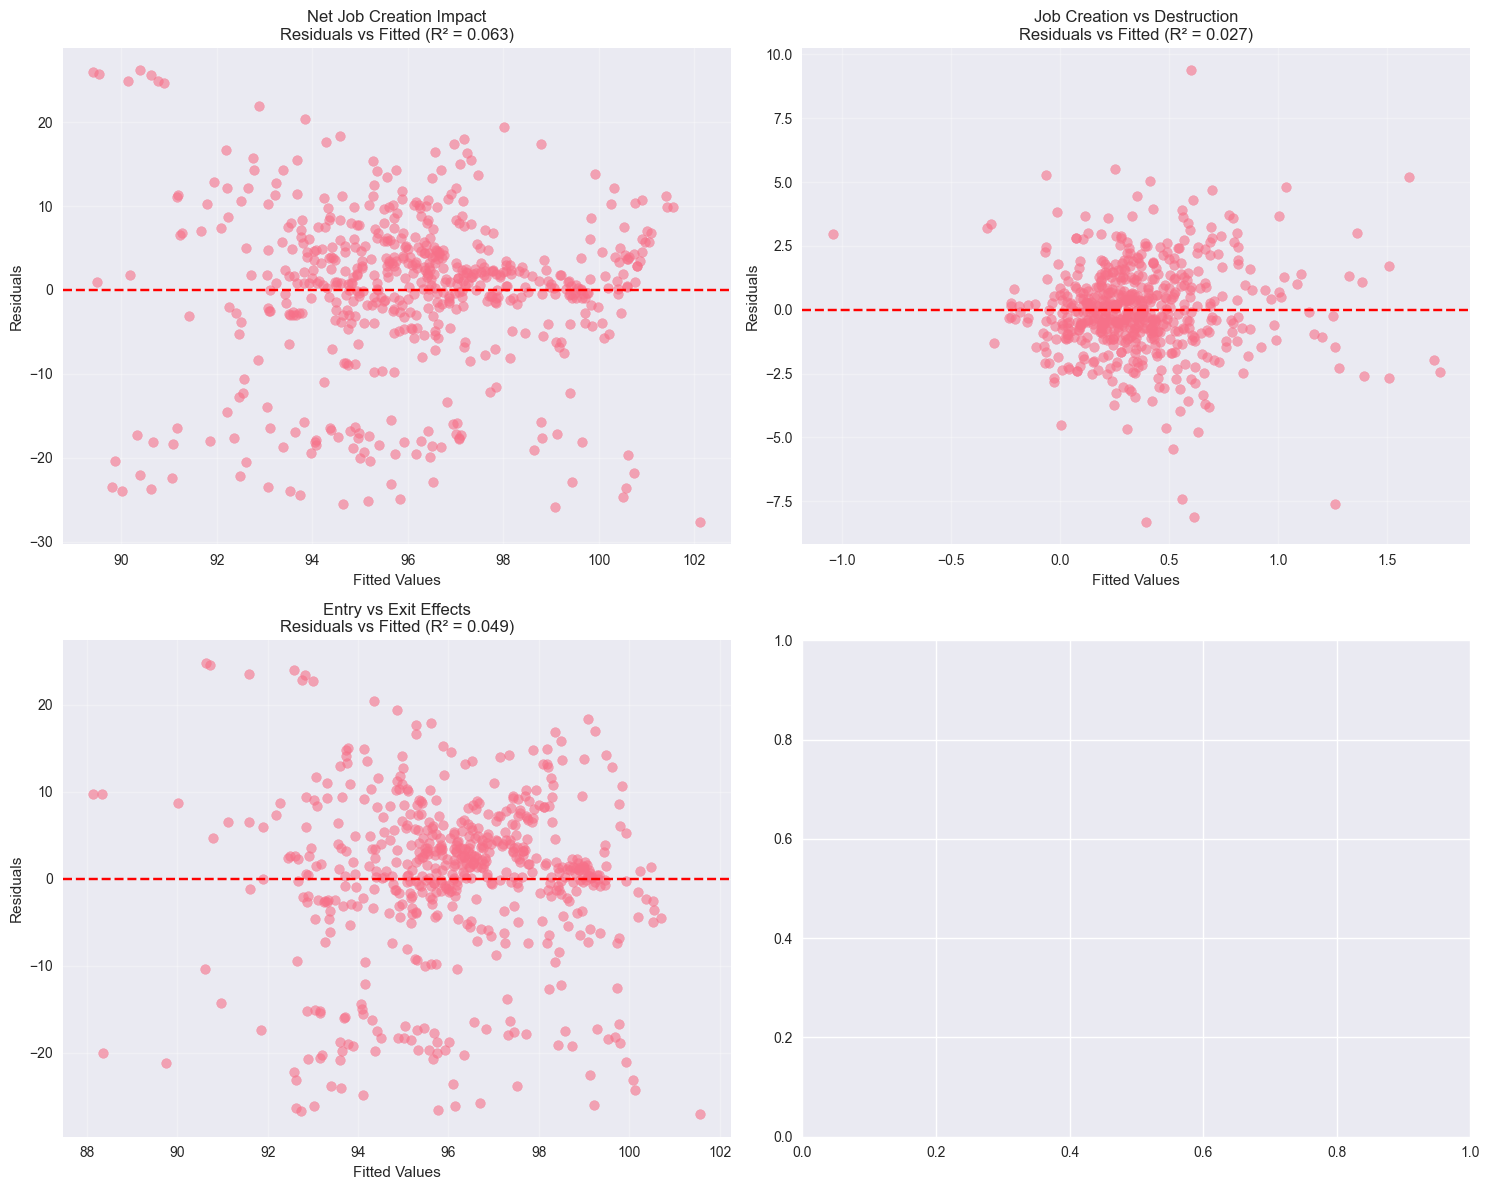

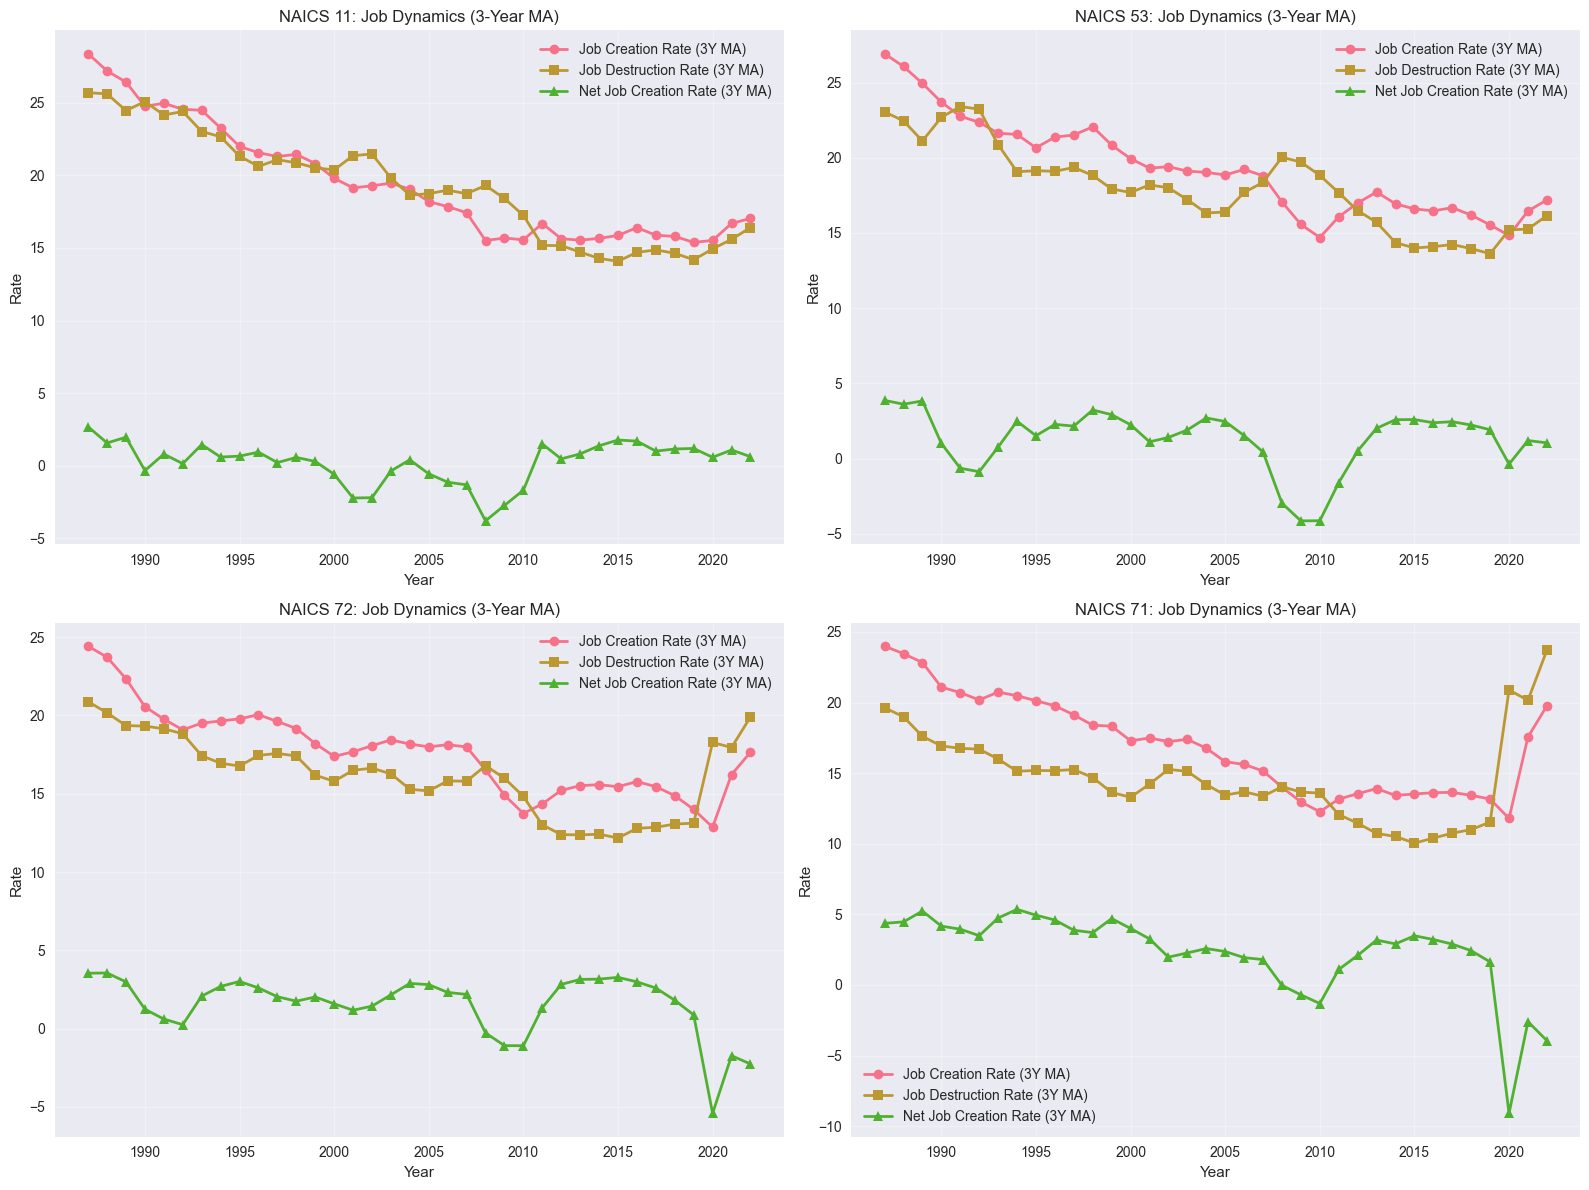

In [82]:
df_ma, regression_results, industry_results = run_complete_analysis(merged)


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def create_simple_moving_averages(df, variables, window=3):
    """
    Create 3-year moving averages for specified variables
    """
    df_ma = df.copy()
    
    # Sort by NAICS and year for proper time series
    df_ma = df_ma.sort_values(['NAICS', 'year'])
    
    for naics in df['NAICS'].unique():
        mask = df_ma['NAICS'] == naics
        
        for var in variables:
            if var in df_ma.columns:
                # Calculate 3-year moving average for this industry
                ma_values = df_ma.loc[mask, var].rolling(window=window, center=True, min_periods=1).mean()
                df_ma.loc[mask, f'{var}_MA3'] = ma_values
    
    return df_ma

def plot_job_creation_ma(df_ma, naics_codes=None, max_industries=6):
    """
    Plot job creation with 3-year moving average
    """
    if naics_codes is None:
        # Get top industries by data availability
        naics_codes = df_ma['NAICS'].value_counts().head(max_industries).index.tolist()
    
    n_industries = len(naics_codes)
    n_cols = 3
    n_rows = (n_industries + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
    if n_rows == 1:
        axes = [axes] if n_industries == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, naics in enumerate(naics_codes):
        industry_data = df_ma[df_ma['NAICS'] == naics].sort_values('year')
        
        if not industry_data.empty and 'job_creation' in industry_data.columns:
            ax = axes[i] if n_industries > 1 else axes
            
            # Plot original data
            ax.plot(industry_data['year'], industry_data['job_creation'], 
                   alpha=0.3, color='lightblue', linewidth=1, label='Original')
            
            # Plot moving average
            if 'job_creation_MA3' in industry_data.columns:
                ax.plot(industry_data['year'], industry_data['job_creation_MA3'], 
                       color='darkblue', linewidth=3, marker='o', markersize=4, 
                       label='3-Year Moving Average')
            
            # Get industry name if available
            industry_name = industry_data['Industry'].iloc[0] if 'Industry' in industry_data.columns else f"NAICS {naics}"
            ax.set_title(f'{naics}: {industry_name[:40]}', fontsize=12, fontweight='bold')
            ax.set_xlabel('Year')
            ax.set_ylabel('Job Creation')
            ax.legend()
            ax.grid(True, alpha=0.3)
    
    # Hide empty subplots
    if n_industries < len(axes):
        for i in range(n_industries, len(axes)):
            axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('Job Creation: Original vs 3-Year Moving Average', fontsize=16, y=1.02)
    return fig

def plot_single_variable_comparison(df_ma, variable, naics_codes=None, max_industries=6):
    """
    Plot any variable with its moving average for comparison
    """
    if naics_codes is None:
        naics_codes = df_ma['NAICS'].value_counts().head(max_industries).index.tolist()
    
    n_industries = len(naics_codes)
    n_cols = 2
    n_rows = (n_industries + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_industries == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, naics in enumerate(naics_codes):
        industry_data = df_ma[df_ma['NAICS'] == naics].sort_values('year')
        
        if not industry_data.empty and variable in industry_data.columns:
            ax = axes[i] if n_industries > 1 else axes
            
            # Plot original data
            ax.plot(industry_data['year'], industry_data[variable], 
                   alpha=0.4, color='gray', linewidth=1, label='Original', marker='.')
            
            # Plot moving average
            ma_var = f'{variable}_MA3'
            if ma_var in industry_data.columns:
                ax.plot(industry_data['year'], industry_data[ma_var], 
                       color='red', linewidth=3, marker='o', markersize=5, 
                       label='3-Year Moving Average')
            
            # Get industry name
            industry_name = industry_data['Industry'].iloc[0] if 'Industry' in industry_data.columns else f"NAICS {naics}"
            ax.set_title(f'{naics}: {industry_name[:30]}', fontsize=11, fontweight='bold')
            ax.set_xlabel('Year')
            ax.set_ylabel(variable.replace('_', ' ').title())
            ax.legend()
            ax.grid(True, alpha=0.3)
    
    # Hide empty subplots
    if n_industries < len(axes):
        for i in range(n_industries, len(axes)):
            axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle(f'{variable.replace("_", " ").title()}: Original vs 3-Year Moving Average', 
                 fontsize=14, y=1.02)
    return fig

# Simple usage functions
def create_and_plot_job_creation(df):
    """
    Simple function to create moving averages and plot job creation
    """
    print("Creating 3-year moving averages for job creation...")
    
    # Create moving averages for job-related variables
    job_variables = ['job_creation', 'job_creation_rate', 'job_destruction', 
                     'job_destruction_rate', 'net_job_creation', 'net_job_creation_rate']
    
    # Only use variables that exist in the dataframe
    available_vars = [var for var in job_variables if var in df.columns]
    print(f"Found these job variables: {available_vars}")
    
    df_ma = create_simple_moving_averages(df, available_vars)
    
    # Plot job creation
    fig = plot_job_creation_ma(df_ma)
    plt.show()
    
    return df_ma

def plot_specific_variable(df_ma, variable_name):
    """
    Plot a specific variable with its moving average
    """
    if variable_name in df_ma.columns:
        fig = plot_single_variable_comparison(df_ma, variable_name)
        plt.show()
    else:
        print(f"Variable '{variable_name}' not found in dataframe")
        print(f"Available variables: {list(df_ma.columns)}")

# Usage examples:
print("To create moving averages and plot job creation:")
print("df_with_ma = create_and_plot_job_creation(merged)")
print()
print("To plot a specific variable:")
print("plot_specific_variable(df_with_ma, 'job_creation_rate')")
print("plot_specific_variable(df_with_ma, 'net_job_creation')")
print("plot_specific_variable(df_with_ma, 'estabs_entry_rate')")

To create moving averages and plot job creation:
df_with_ma = create_and_plot_job_creation(merged)

To plot a specific variable:
plot_specific_variable(df_with_ma, 'job_creation_rate')
plot_specific_variable(df_with_ma, 'net_job_creation')
plot_specific_variable(df_with_ma, 'estabs_entry_rate')


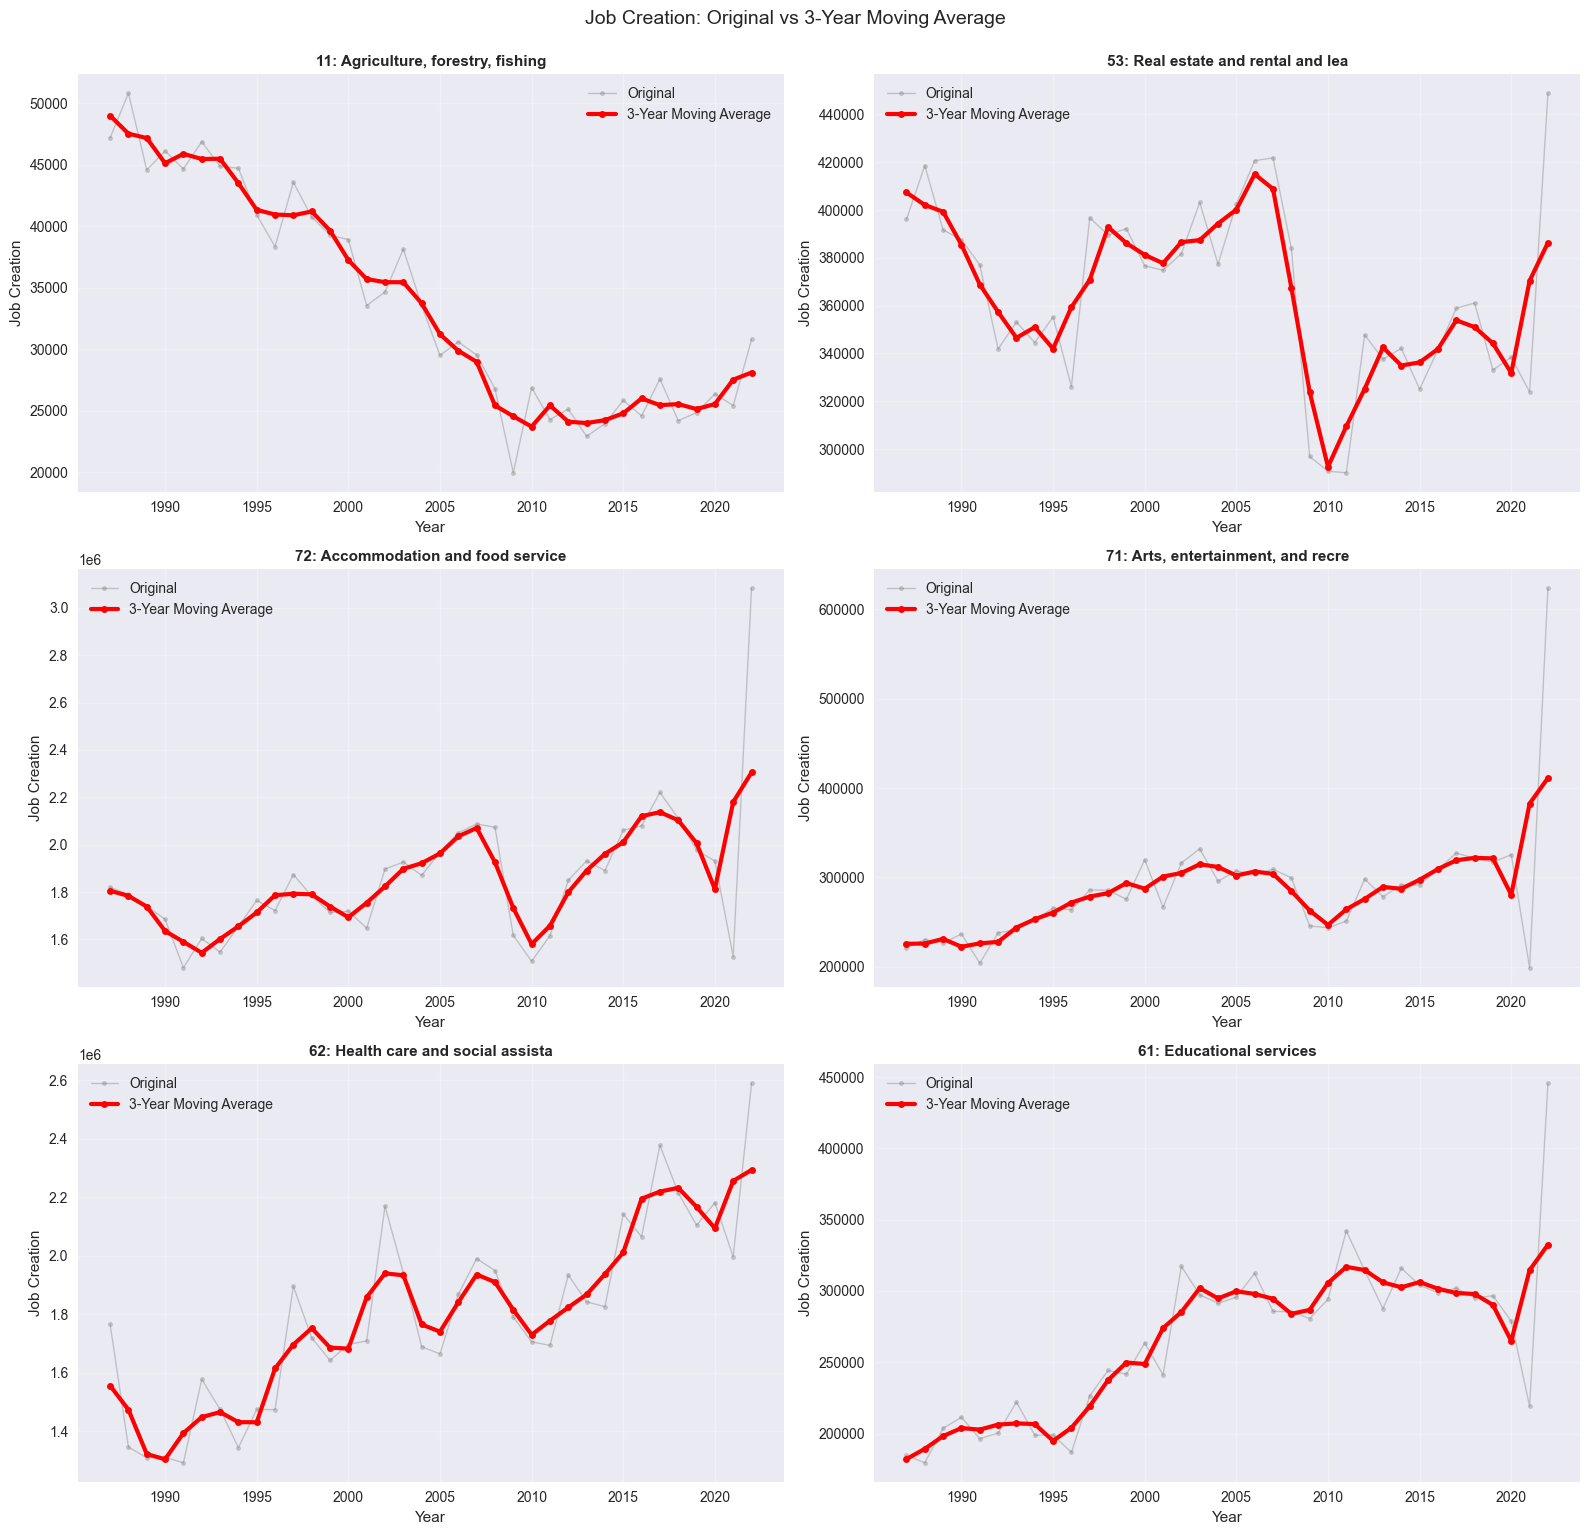

In [85]:
# Just create moving averages without plotting
job_variables = ['job_creation', 'job_creation_rate', 'net_job_creation']
df_with_ma = create_simple_moving_averages(merged, job_variables)

# Then plot whatever you want
plot_specific_variable(df_with_ma, 'job_creation')